## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
from tensorflow import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*(x / 255.) - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170   

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0714 21:48:20.097329  8484 deprecation.py:323] From C:\Users\qwerz\Miniconda3\envs\ML100\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 66us/sample - loss: 1.7896 - accuracy: 0.3706 - val_loss: 1.5741 - val_accuracy: 0.4475
Epoch 2/100
50000/50000 [==============================] - 3s 55us/sample - loss: 1.5143 - accuracy: 0.4663 - val_loss: 1.4799 - val_accuracy: 0.4697
Epoch 3/100
50000/50000 [==============================] - 3s 53us/sample - loss: 1.4010 - accuracy: 0.5082 - val_loss: 1.4440 - val_accuracy: 0.4866
Epoch 4/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.3138 - accuracy: 0.5360 - val_loss: 1.4232 - val_accuracy: 0.4968
Epoch 5/100
50000/50000 [==============================] - 3s 54us/sample - loss: 1.2402 - accuracy: 0.5651 - val_loss: 1.3981 - val_accuracy: 0.5107
Epoch 6/100
50000/50000 [==============================] - 3s 56us/sample - loss: 1.1799 - accuracy: 0.5843 - val_loss: 1.3989 - val_accuracy: 0.5153
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 3s 55us/sample - loss: 0.1814 - accuracy: 0.9371 - val_loss: 3.6038 - val_accuracy: 0.5017
Epoch 56/100
50000/50000 [==============================] - 3s 54us/sample - loss: 0.1569 - accuracy: 0.9455 - val_loss: 3.6073 - val_accuracy: 0.5021
Epoch 57/100
50000/50000 [==============================] - 3s 53us/sample - loss: 0.1732 - accuracy: 0.9386 - val_loss: 3.6296 - val_accuracy: 0.5033
Epoch 58/100
50000/50000 [==============================] - 3s 53us/sample - loss: 0.1438 - accuracy: 0.9504 - val_loss: 3.6717 - val_accuracy: 0.5066
Epoch 59/100
50000/50000 [==============================] - 3s 54us/sample - loss: 0.1371 - accuracy: 0.9535 - val_loss: 3.6683 - val_accuracy: 0.5004
Epoch 60/100
50000/50000 [==============================] - 3s 53us/sample - loss: 0.1725 - accuracy: 0.9406 - val_loss: 3.6713 - val_accuracy: 0.5007
Epoch 61/100
50000/50000 [==============================] - 3s 53us/sample - loss: 0.1745 - ac

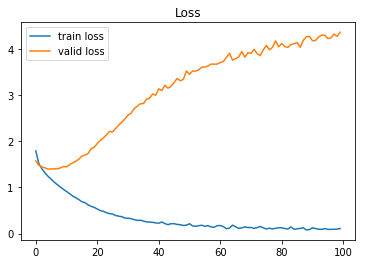

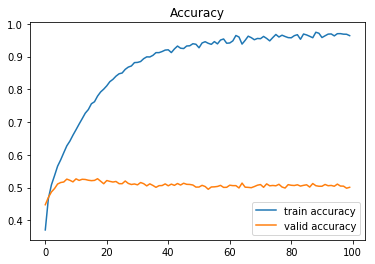

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()